<a href="https://colab.research.google.com/github/KCW-colab/pytorch-example/blob/master/%EB%B0%91%EB%B0%94%EB%8B%A52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

행아웃 https://hangouts.google.com/call/H1BT80UlutUsEG3guXgpACEM

### 1장 - 신경망 복습

In [ ]:
import numpy as np
x = np.array([1, 2, 3])
x.__class__ # 클래스 이름 표시


numpy.ndarray

In [ ]:
x.shape

(3,)

In [ ]:
x.ndim

1

In [ ]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [ ]:
W.ndim

2

In [ ]:
W = np.array([[1, 2, 3,], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print(W*X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [ ]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [ ]:
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [ ]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

 # 행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.matmul(A, B)

# 2차원 까지는 np.dot이나 matmul의 역할이 같음.

32


array([[19, 22],
       [43, 50]])

In [ ]:
import numpy as np
W1 = np.random.randn(2, 4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10, 2) # 입력
h = np.matmul(x, W1) + b1
print(h.shape)

(10, 4)


In [ ]:
def sigmoid(x):
  return 1 / ( 1+ np.exp(-x))


In [ ]:
a = sigmoid(h)

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2) 
W1 = np.random.randn(2, 4) 
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3) 
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2
print(s.shape)

(10, 3)


In [ ]:
import numpy as np
class Sigmoid:
  def __init__(self):
    self.params=[]

  def forward(self, x):
    return 1 / ( 1+ np.exp(-x))

class Affine:
  def __init__(self, W, b):
    self.params = [W, b]

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    return out

In [ ]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = np.random.randn(I, H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H, O)
    b2 = np.random.randn(O)

    # 게층 생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

    # 모든 가중치를 리스트에 모은다.
    self.params=[]
    for layer in self.layers:
      self.params += layer.params

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x


In [ ]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s.shape)

(10, 3)


In [ ]:
import numpy as np
D, N  = 8 , 7
x = np.random.randn(1, D) # 입력
y = np.repeat(x, N, axis = 0) # 순전파  # 원소 복제를 시행하는 numpy의 함수 (x 를 N번 복제하는데 세로방향으로 복제함.)
# y.shape = (7,8)
dy = np.random.randn(N, D) # 무작위 기울기
dx = np.sum(dy, axis = 0, keepdims=True) # 역전파 # 2차원 유지를 위해 keepdims = True로 둠.

In [ ]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D) # 입력
y = np.sum(x, axis = 0, keepdims = True) # 순전파
dy = np.random.randn(1, D) # 무작위 기울기
dx = np.repeat(dy, N, axis=0) # 역전파
# Sum 노드와 repeat 노드는 반대관계임.
# ex) Sum 노드의 순전파 => repeat 노드의 역전파

In [ ]:
class MatMul:
  def __init__(self, W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None
  
  def forward(self, x):
    W, = self.params
    out = np.matmul(x, W)
    self.x = x
    return out

  def backward(self, dout):
    W, = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    self.grads[0][...] = dW
    return dx

In [ ]:
'''
얕은 복사는 본품의 메모리값을 복사하는 것임.
깊은 복사는 본품의 숫자 자체를 복사해오는 것

얕은 복사 종류
list1 = [1, 2, 3]
list2 = list1

깊은 복사 종류
list2 = list1[:]
list2 = list1.copy
'''


'\n얕은 복사는 본품의 메모리값을 복사하는 것임.\n깊은 복사는 본품의 숫자 자체를 복사해오는 것\n\n얕은 복사 종류\nlist1 = [1, 2, 3]\nlist2 = list1\n\n깊은 복사 종류\nlist2 = list1[:]\nlist2 = list1.copy\n'

In [ ]:
class Sigmoid:
  def __init__(self):
    self.params, self.grads = [], []
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return out

In [ ]:
class Affine:
  def __init__(self, W, b):
    self.params = [W, b]
    self.grads = [np.zeros_like(W), np.zeros_like(b)]
    self.x = None

  def forward(self, x):
    W, b = self.params
    out = np.matmul(x, W) + b
    self.x = x
    return out

  def backward(self, dout):
    W, b = self.params
    dx = np.matmul(dout, W.T)
    dW = np.matmul(self.x.T, dout)
    db = np.sum(dout, axis = 0)

    self.grads[0][...] = dW
    self.grads[1][...] = db
    return dx

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for i in range(len(params)):
      params[i] -= self.lr * grads[i]

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)


from dataset import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()
print('x', x.shape) # (300, 2)
print('t', t.shape) # (300, 3)

'''
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()
'''


x (300, 2)
t (300, 3)


"\n# 데이터점 플롯\nN = 100\nCLS_NUM = 3\nmarkers = ['o', 'x', '^']\nfor i in range(CLS_NUM):\n    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])\nplt.show()\n"

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I, H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H, O)
    b2 = np.zeros(0)

    # 계층 생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss


  def backward(self, dout = 1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

|에폭 1| 반복 10 / 10 | 손실 1.13
|에폭 2| 반복 10 / 10 | 손실 1.13
|에폭 3| 반복 10 / 10 | 손실 1.12
|에폭 4| 반복 10 / 10 | 손실 1.12
|에폭 5| 반복 10 / 10 | 손실 1.11
|에폭 6| 반복 10 / 10 | 손실 1.14
|에폭 7| 반복 10 / 10 | 손실 1.16
|에폭 8| 반복 10 / 10 | 손실 1.11
|에폭 9| 반복 10 / 10 | 손실 1.12
|에폭 10| 반복 10 / 10 | 손실 1.13
|에폭 11| 반복 10 / 10 | 손실 1.12
|에폭 12| 반복 10 / 10 | 손실 1.11
|에폭 13| 반복 10 / 10 | 손실 1.09
|에폭 14| 반복 10 / 10 | 손실 1.08
|에폭 15| 반복 10 / 10 | 손실 1.04
|에폭 16| 반복 10 / 10 | 손실 1.03
|에폭 17| 반복 10 / 10 | 손실 0.96
|에폭 18| 반복 10 / 10 | 손실 0.92
|에폭 19| 반복 10 / 10 | 손실 0.92
|에폭 20| 반복 10 / 10 | 손실 0.87
|에폭 21| 반복 10 / 10 | 손실 0.85
|에폭 22| 반복 10 / 10 | 손실 0.82
|에폭 23| 반복 10 / 10 | 손실 0.79
|에폭 24| 반복 10 / 10 | 손실 0.78
|에폭 25| 반복 10 / 10 | 손실 0.82
|에폭 26| 반복 10 / 10 | 손실 0.78
|에폭 27| 반복 10 / 10 | 손실 0.76
|에폭 28| 반복 10 / 10 | 손실 0.76
|에폭 29| 반복 10 / 10 | 손실 0.78
|에폭 30| 반복 10 / 10 | 손실 0.75
|에폭 31| 반복 10 / 10 | 손실 0.78
|에폭 32| 반복 10 / 10 | 손실 0.77
|에폭 33| 반복 10 / 10 | 손실 0.77
|에폭 34| 반복 10 / 10 | 손실 0.78
|에폭 35| 반복 10 / 10 | 손실

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

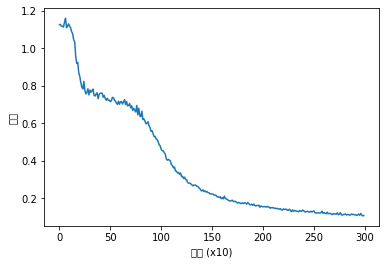

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master/ch01")
sys.path.append(os.pardir)
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300 # 학습하는 에폭 수
batch_size = 30 # 미니배치 크기
hidden_size = 10 # 은닉층의 뉴런 수
learning_rate = 1.0 # 학습률


x, t = spiral.load_data()
# 데이터 읽기
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
# 신경망 모델 생성
optimizer = SGD(lr = learning_rate)
# SGD 모델 생성
# 에폭은 학습 단위로서, 1에폭은 학습 데이터를 모두 '살펴본' 시점.

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size  # // 연산자는 나눗셈 후 소숫점을 버리는 연산자.
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size]
    batch_t = t[iters*batch_size:(iters+1)*batch_size]

  # 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

  # 역전파 순전파를 이용해서 기울기들을 모두저장

    total_loss += loss
    loss_count += 1

  

  # 정기적으로 학습 경과 출력
    if (iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print('|에폭 %d| 반복 %d / %d | 손실 %.2f' %(epoch+1, iters+1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

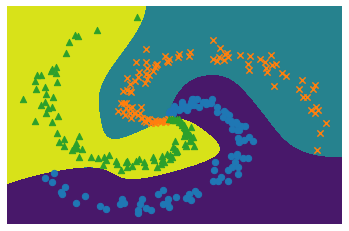

In [ ]:
# 경계 영역을 보면 나선형 패턴을 올바르게 파악했음을 알 수 있음

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X) 
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

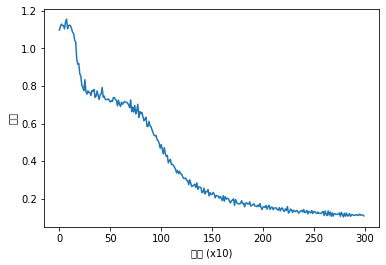

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr=learning_rate)

# 앞에 했던 내용을 간단하게 Trainer 라는 클래스로 묶었을 뿐임.
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

In [ ]:
import numpy as np
a = np.random.randn(3)
print(a.dtype)
# 넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용함
# 그러나 신경망의 추론과 학습은 32비트에서도 문제없이 잘 작동하기 때문에
# 32비트로 떨어뜨려주는게 계산속도를 증가시키는데에 용이함.
b = np.random.randn(3).astype(np.float32)
print(b.dtype)
c = np.random.randn(3).astype('f')
print(c.dtype)
# np.float32 나 f로 지정하면 32비트로 변경
# 신경망 추론으로 한정하면 16비트를 사용해도 인식률이 거의 떨어지지 않음.
# 다만 일반적으로 CPU와 GPU는 연산자체를 32비트로 수행하기 때문에 
# 처리 속도 측면에서는 혜택이 없을 수도 있음.
# 그러나 학습된 가중치를 저장할 때는 16비트 부동소수점 수가 여전히 유효함. (데이터가 절반이므로)
# 그래서 이 책에서는 학습된 가중치를 저장하는 경우에 한해 16비트 부동소수점 수로 변환함.


float64
float32
float32


In [ ]:
'''
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
print(x)
'''
# 대량의 곱하기 연산은 병렬로 계산되는데 이 점에서는
# CPU 보다 GPU가 훨씬 유리함. 그래서 GPU 사용에 대해 설명
# 쿠파이는 GPU를 이용해 병렬 계산을 수행해 주는 라이브러리임.
# 쿠파이의 사용방법은 기본적으로 넘파이와 같음.
# 사용법은 같지만 뒤에서 열심히 GPU를 사용해 계산하는 것.
# 보통은 numpy를 cupy로 대체해주기만 하면 끝

"\nimport cupy as cp\nx = cp.arange(6).reshape(2, 3).astype('f')\nprint(x)\n"

### 2장 - 자연어와 단어의 분산 표현

In [ ]:
text = 'You say goodbye and I say hello.'
text = text.lower() # 모든 문자를 소문자로 변환
text = text.replace('.', ' .')  # (.) 을  ( .) 로 변환
text


'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ') # 공백을 기준으로 분할
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

print(id_to_word)
print(word_to_id)

print(id_to_word[1])
print(word_to_id['hello'])

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
say
5


In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
import numpy as np
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])


  return corpus, word_to_id, id_to_word 

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus): # 순서가 있는 자료형에서 index 번호와 index 값을 반환함.    
  # 이 경우에서 corpus는 [0 1 2 3 4 1 5 6] 이므로 idx는 [0 1 2 3 4 5 6 7] word_id는 [0 1 2 3 4 1 5 6] 임.
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i
      # 제일 왼쪽 인덱스랑 오른쪽 인덱스의 왼쪽/ 오른쪽은 word의 len를 벗어나니까 그걸 방지하기 위해서 밑에 코드가 있음.

      if left_idx >= 0 :  
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx] # 여기서 corpus[] 는 value 값임.
        co_matrix[word_id, right_word_id] += 1
  return co_matrix

In [ ]:
'''
def cos_similarity(x, y):
  nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
  ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
  return np.dot(nx, ny)
'''
 # 위에서는 x나 y가 0일 때 분모에 문제가 생기므로 분모에 아주 작은 값을 더해주면 효율적인 계산이 가능함
def cos_similarity(x, y, eps=1e-8):
  nx = x / np.sqrt(np.sum(x**2) + eps) 
  ny = y / np.sqrt(np.sum(y**2) + eps) 
  return np.dot(nx, ny)


In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
from common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # "you" 의 단어 벡터
c1 = C[word_to_id['i']] # "i" 의  단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


In [ ]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
  # 검색어를 꺼낸다.
  if query not in word_to_id:
    print('%s(을)를 찾을 수 없습니다.' %query)
    return
  
  print('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)

  # 코사인 유사도를 기준으로 내림차순으로 출력
  count = 0
  for i in ( -1 * similarity).argsort(): # argsort의 의미는 배열의 원소를 오름차순으로 정렬하는 것. 그런데 여기서는 similarity 에 -1을 곱했으니 내림차순으로 바뀜.
    if id_to_word[i] == query:
      continue
    print(' %s: %s' %(id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

In [ ]:
corpus, word_to_id, id_to_word = preprocess(text)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C)


[query]you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [ ]:
# argsort()의 의미를 잘 생각해 볼 것.
x = np.array([100, -20, 2]) 
print(x.argsort()) # 오름차순 정렬
print((-x).argsort()) # 각 원소에 -1을 곱했으니 내림차순 정렬이 됨.

[1 2 0]
[0 2 1]


In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)

from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id) 
# word to id {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} 
# 단어들을 어떤 value로 표현해준다고 생각하면 쉬움.
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)

# 위의 코드는 기존 적어놨던 코드를 이용해서 구현했음.


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [ ]:
# 상호정보량
# x,y의 관련성에 대해 설명하는 내용인데 얼마나 많이 등장하느냐에 대한 확률로 표현함.
# 이것이 왜 중요하냐면, 예컨대 the, car, drive 사이의 양의 상호정보량에 대해 생각을 해보자.
# 분명히 car 앞에는 the가 많이 붙어있을 것임. 그러나 car는 the와 별로 관련이 없는 단어이고 오히려 drive와 관련이 큼.
# 예로, the가 1000번, car가 20번, drive가 10번 등장하는 말뭉치가 있다고 가정해봄.
# 이 때, the와 car가 동시에 등장하는 횟수는 10 , car와 drive가 동시에 등장하는 횟수는 5라고 생각해보자.
# 이러면 상호정보량은 당연히 car와 drive 사이에서의 값이 더 높음. 
# 왜냐면 the는 car가 아니어도 많이 나오기 때문. 즉 독립적으로 나오는 횟수를 고려하기 때문임.
# 근데 여기서, log 함수를 사용하기 때문에 log가 0에 가까워지면, 즉 x,y가 출현을 거의 안한다면 문제가 됨.
# 따라서 PPMI = max(0,PMI(x,y)) 로 양의 값으로 바꿔주면 계산에 아주 유용할 듯.

In [ ]:
# 단어 사이의 관련성을 0 이상의 실수로 나타내는 함수
# verbose는 진행상황 출력 여부를 결정하는 플래그
# 큰 말뭉치를 다룰 때 verbose= True 로 설정하면 중간중간 진행 상황을 알려줌.
def ppmi(C, verbose=False, eps = 1e-8):   
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shpae[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j]*S[i] + eps)) # log2는 밑이 2인 로그
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total // 100) == 0:
          print('%.1f%% 완료' %(100*cnt/total))
  return M

# 이 코드는 동시발생 행렬에 대해서만 PPMI 행렬을 구할 수 있도록 하고자 단순화 해서 구현했음.


In [ ]:
# 동시발생 행렬을 PPMI 행렬로 변환해보자.
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'* 50)
print('PPMI')
print(W)


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [ ]:
# 차원감소
# PPMI 행렬에도 큰 문제가 있음. 말뭉치의 어휘 수가 10만 개라면 그 벡터의 차원 수도 똑같이 10만이 됨.
# 10만 차원의 벡터를 다룬다는 것은 그다지 현실적이지 않음.
# 행렬의 내용을 들여다보면 원소 대부분이 0인 것을 알 수 있음. 
# 벡터의 원소 대부분이 중요하지 않다는 뜻인데 그렇다면 '중요한 정보'는 최대한 유지하면서 차원을 줄이는게 핵심이 됨.
# 새로운 축을 도입하여 똑같은 데이터를 좌표축 하나만으로 표시한 그림 확인.
# 여기서 중요한 것은 가장 적합한 축을 찾아내는 일로, 1차원 값만으로도 데이터의 본질적인 차이를 구별할 수 있어야 함.
# 그 방법으로 SVD 방법을 사용함. 책을 확인하면 더 자세하게 나와있음.

In [ ]:
# SVD를 파이썬 코드로 살펴보자. 
# linalg 모듈이 제공하는 svd 메서드로 실행할 수 있음. linalg는 선형대수의 약어임.
import os, sys
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size = 1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

# 동시 발생 행렬을 만들어 PPMI 행렬로 변환한 다음 SVD를 적용시킴.

In [ ]:
print(C[0]) # 동시발생 행렬
print(W[0]) # PPMI 행렬
print(U[0]) # SVD
print(U[0, :2]) # 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 됨.

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]
[0.341 0.   ]


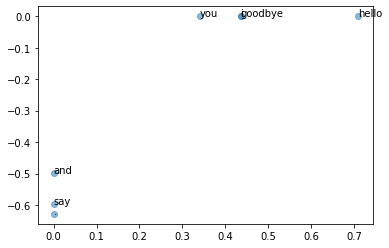

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

# plt.annotate(word,x,y) 메서드는 2차원 그래프상에서 좌표(x,y) 지점에 word에 담긴 텍스트를 그림.
# 그림을 보면 goodbye 와 hello, you, i 가 제법 가까이 있음을 알 수 있음.

In [ ]:
import sys, os
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.chdir)

from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:' , len(corpus))
print('corpus[:30]', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])


말뭉치 크기: 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [ ]:
import sys
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-2-master/deep-learning-from-scratch-2-master")
sys.path.append(os.pardir)
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size) 
# 윈도우 크기가 2면 타깃 단어 좌우 2단어씩을 맥락에 포함
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
  # truncated SVD( 빠르다! )
  from sklearn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components = wordvec_size, n_iter=5, random_state=None)

except ImportError:
  # SVD (느리다)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size] # U의 행전체, 열은 100까지만. (차원축소 인듯.)
 
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)


동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query] you
 i: 0.6468660831451416
 we: 0.6108704805374146
 anybody: 0

## 3장 - word2vec